# Challenge : Comment construire le nouveau hit 2019 ?

In [1]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import billboard
import seaborn as sns
from scipy import stats
import requests
from urllib.request import urlopen as uRequest
from bs4 import BeautifulSoup
import json
import spotify_token as st
import spotipy.util as util
import spotipy

## Data song features till 2010

In [2]:
path = "/Users/valentinphetchanpheng/Documents/MS BGD Telecom ParisTech/Kit Data Science/"
data = pd.read_csv(path + "music.csv")
print("Dimension data : ", data.shape)
pd.set_option('display.max_columns', 60)
data.head(10)

Dimension data :  (10000, 35)


,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007
5,0.385471,ARKFYS91187B98E58F,Jeff And Sheri Easter,NaN,0.0,0.121,1.17118,0.438,0.74856,267.70240,2.264,0.535293,5.0,0.635,37.157357,Not available,-63.933358,-9.323,1,0.557,41838,Ordinary Day,ARHNMEZ11F50C4706C,NaN,SOYMRWW12A6D4FAB14,254.270,0.136,0.53929,147.782,southern gospel,1.000000,3.0,0.454,The Moon And I (Ordinary Day Album Version),0
6,0.261941,ARD0S291187B9B7BF5,Rated R,NaN,0.0,0.709,0.27253,0.709,0.27253,114.78159,0.096,0.556496,1.0,0.000,37.157357,Ohio,-63.933358,-17.302,1,0.000,25824,Da Ghetto Psychic,ARF93II1187B99F981,NaN,SOMJBYD12A6D4F8557,114.782,0.467,0.05611,111.787,breakbeat,1.000000,1.0,0.000,Keepin It Real (Skit),0
7,0.605507,AR10USD1187B99F3F1,Tweeterfriendly Music,NaN,0.0,0.142,0.65428,0.234,0.65428,189.57016,0.319,0.801136,4.0,0.000,37.157357,"Burlington, Ontario, Canada",-63.933358,-11.642,0,0.160,8876,Gin & Phonic,ARJXL4Z1187B9A5920,NaN,SOHKNRJ12A6701D1F8,181.023,0.292,0.36129,101.430,post-hardcore,0.999818,3.0,0.408,Drop of Rain,0
8,0.332276,AR8ZCNI1187B9A069B,Planet P Project,NaN,0.0,0.806,1.91886,0.440,1.22595,269.81832,5.300,0.426668,4.0,0.717,37.157357,Not available,-63.933358,-13.496,1,0.652,358182,Pink World,ARWVP631187FB4D016,0.265861,SOIAZJW12AB01853F1,258.990,0.121,1.22595,86.643,new wave,0.959766,4.0,0.487,Pink World,1984
9,0.422706,ARNTLGG11E2835DDB9,Clp,NaN,0.0,0.047,0.62445,1.000,0.09933,266.39628,0.084,0.550514,7.0,0.053,37.157357,Not available,-63.933358,-6.697,0,0.473,692313,Superinstrumental,ARAR1XA11C8A415BE5,NaN,SOUDSGM12AC9618304,261.747,1.000,0.09933,114.041,breakcore,0.915602,4.0,0.878,Insatiable (Instrumental Version),0


### Popularité

Text(0.5, 1.0, 'Familiarity vs Song Hotness')

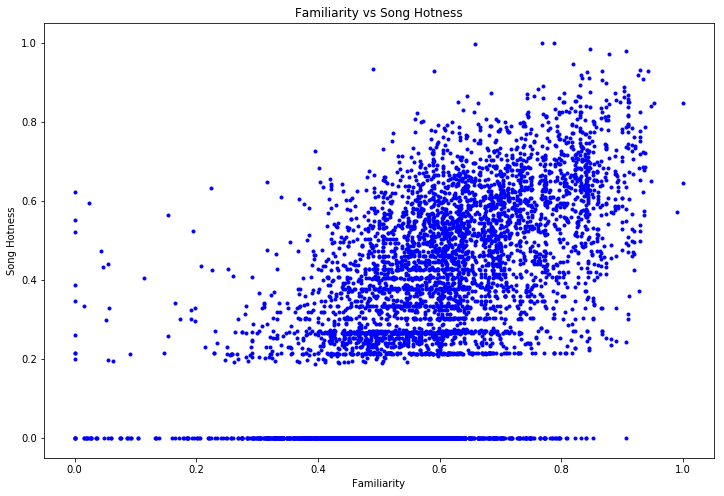

In [3]:
plt.figure(figsize=(12,8))
plt.plot(data["familiarity"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Familiarity")
plt.ylabel("Song Hotness")
plt.title("Familiarity vs Song Hotness")

Text(0.5, 1.0, 'Artist Hotness vs Song Hotness')

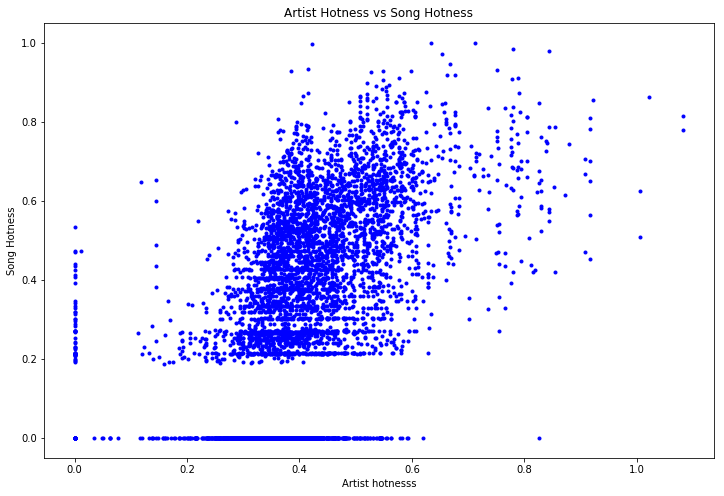

In [4]:
plt.figure(figsize=(12,8))
plt.plot(data["artist.hotttnesss"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Artist hotnesss")
plt.ylabel("Song Hotness")
plt.title("Artist Hotness vs Song Hotness")

### Structure

Text(0.5, 1.0, 'Tempo vs Song Hotness')

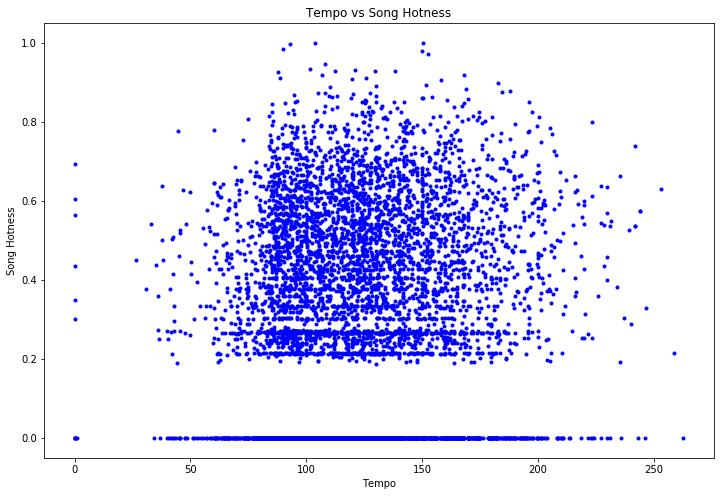

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data["tempo"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Tempo")
plt.ylabel("Song Hotness")
plt.title("Tempo vs Song Hotness")

In [6]:
#data[data["artist.name"] == "Lil Wayne"]
year = data.year.unique()
np.sort(year)

array([   0, 1926, 1927, 1929, 1930, 1934, 1935, 1936, 1940, 1947, 1950,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010])

In [7]:
data_spotify = pd.read_csv(path + "featuresdf.csv")
print("Dimension data : ", data_spotify.shape)
pd.set_option('display.max_columns', 60)
data_spotify.head(20)

Dimension data :  (100, 16)


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


Text(0.5, 1.0, 'Tempo vs Danceability')

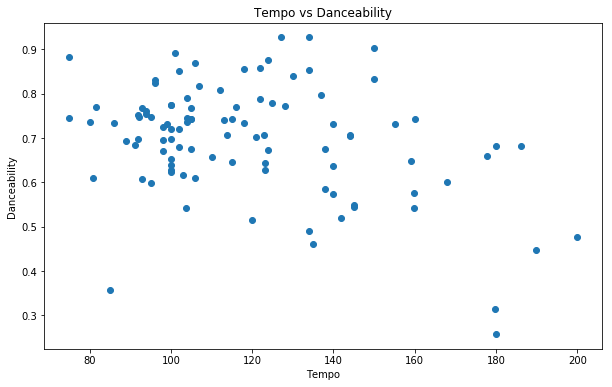

In [8]:
plt.figure(figsize=(10,6))
plt.plot(data_spotify["tempo"], data_spotify["danceability"], 'o')
plt.xlabel("Tempo")
plt.ylabel("Danceability")
plt.title("Tempo vs Danceability")

Text(0.5, 1.0, 'Tempo vs Energy')

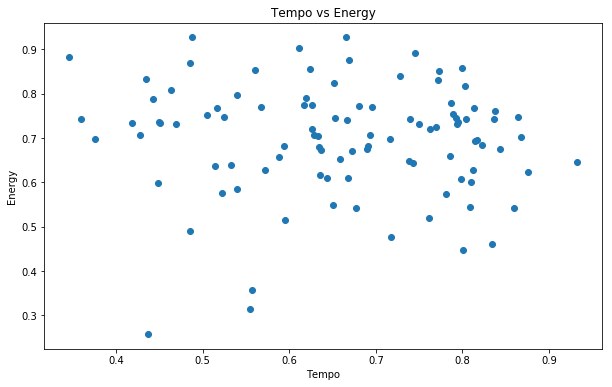

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data_spotify["energy"], data_spotify["danceability"], 'o')
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy")

### Fonction liste des tracks TOP 50 Mondial sur Spotify

In [10]:
def get_tracks_id(uri,sp):
	track_id_uris = []
	username = uri.split(':')[2]
	playlist_id = uri.split(':')[4]
	results = sp.user_playlist(username, playlist_id)
	for song in results['tracks']['items']:
		track_id_uris.append(song['track']['id'])


	return track_id_uris

def get_featured_playlists_uris(name, sp):
	response = sp.featured_playlists()
	#print(response['message'])
	uri = ''

	while response:
		playlists = response['playlists']
		for i, item in enumerate(playlists['items']):
			if item['name'] == name:
				uri = item['uri']
		if playlists['next']:
			response = sp.next(playlists)
		else:
			response = None
	return uri

In [37]:
client_id = "ae2a0a93e2594654bd054f108664a9de"
client_secret = "15d598eed3ea4f5b8ac76c63adb0eee5"
username = '11173741361'
token = util.prompt_for_user_token(username,scope="user-read-private", client_id = client_id, client_secret = client_secret, redirect_uri='http://localhost:8080')
sp = spotipy.Spotify(auth=token)
uri1 = get_featured_playlists_uris('Today\'s Top Hits',sp)
# ID des musiques du top 50 spotify
tracks_id = get_tracks_id(uri1,sp)
tracks_id_world = get_tracks_id("spotify:user:spotifycharts:playlist:37i9dQZEVXbMDoHDwVN2tF",sp)

### DataFrame Audio Features Top 50 Spotify

In [36]:
data = st.start_session("nekostyle@hotmail.fr","firestarkspotify")
access_token = data[0]
expiration_date = data[1]
spotify = spotipy.Spotify(auth=access_token)

df_audio_features = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

for el in tracks_id:
    df_audio_features = df_audio_features.append(spotify.audio_features(el)[0], ignore_index=True)
    
df_audio_features.drop(['uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)
print("Dimension : ", df_audio_features.shape)
df_audio_features

Dimension :  (50, 15)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,0.724,0.647,1,-5.642,1,0.0658,0.28000,0,0.1020,0.4350,106.960,audio_features,2rPE9A1vEgShuZxxzR2tZH,207333,4
1,0.752,0.488,6,-7.050,1,0.0705,0.29700,9.11e-06,0.0936,0.5330,136.041,audio_features,5p7ujcrUXASCNwRaWNHR1C,201661,4
2,0.574,0.758,1,-5.029,0,0.0621,0.09690,0,0.3950,0.4920,144.111,audio_features,5JEx7HbmvHQQswJCsoo9rA,182623,4
3,0.820,0.691,6,-6.646,0,0.0723,0.01150,0,0.3440,0.6830,142.027,audio_features,4m5Cd9kAbIxg6t9sMrQWtk,135739,4
4,0.753,0.498,2,-5.610,1,0.0504,0.55100,0,0.0706,0.9270,89.950,audio_features,1A6OTy97kk0mMdm78rHsm8,158053,4
5,0.654,0.316,0,-14.351,1,0.1090,0.68500,0.0333,0.1170,0.1860,145.074,audio_features,7wC5eZcFS1Q1BsQ35DU6H4,210376,4
6,0.665,0.699,11,-5.265,1,0.0578,0.42300,0,0.0969,0.5850,124.896,audio_features,5tAa8Uaqr4VvA3693mbIhU,190932,4
7,0.540,0.439,10,-8.591,1,0.1150,0.63500,1.93e-05,0.0993,0.3710,167.908,audio_features,7vGGAJBkHKxKtOnGjQduDV,209547,4
8,0.758,0.602,10,-7.909,0,0.0940,0.03760,4.77e-06,0.1110,0.5190,155.038,audio_features,61sqsOPon94ecMskeEXwev,176056,4
9,0.693,0.575,9,-6.998,1,0.0801,0.37400,0,0.2520,0.4920,117.999,audio_features,14sOS5L36385FJ3OL8hew4,211362,4


In [13]:
df_audio_features.dtypes

danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
duration_ms          object
time_signature       object
dtype: object

Text(0.5, 1.0, 'Tempo vs Danceability')

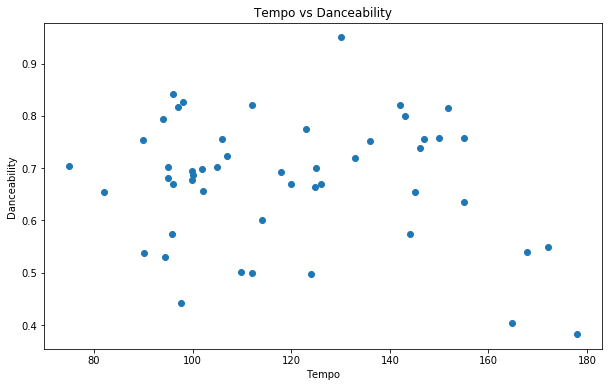

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_audio_features["tempo"], df_audio_features["danceability"], 'o')
plt.xlabel("Tempo")
plt.ylabel("Danceability")
plt.title("Tempo vs Danceability")

Text(0.5, 1.0, 'Tempo vs Energy')

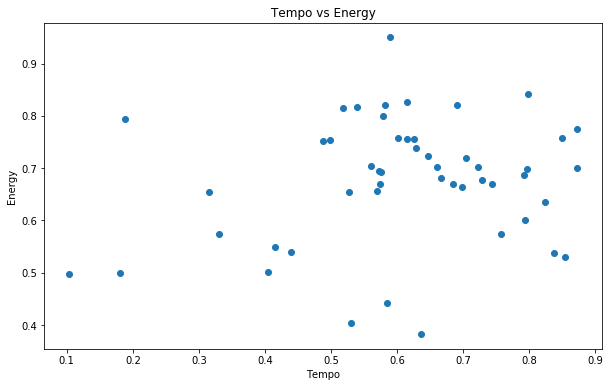

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df_audio_features["energy"], df_audio_features["danceability"], 'o')
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy")

### Fréquence des keys et tonalités des top morceaux 

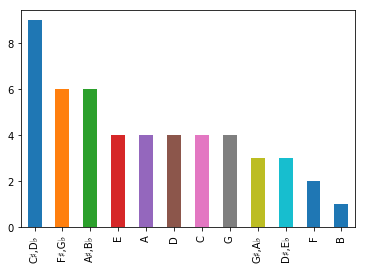

In [26]:
df_audio_features["keyName"] = df_audio_features["key"].map({0 : "C", 1 : "C♯,D♭", 2 : "D", 3 : "D♯,E♭", 4 : "E", 5 :  "F", 6 : "F♯,G♭",7 : "G",8 : "G♯,A♭",9 : "A",10 : "A♯,B♭",11 : "B"})
df_audio_features["modeName"] = df_audio_features["mode"].map({0 : "minor",1 : "major"})
df_audio_features["keyName"].value_counts().plot('bar')

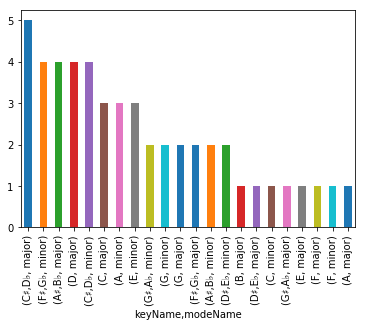

In [34]:
df_audio_features.groupby(["keyName", "modeName"]).size().sort_values(ascending=False).plot("bar")

### DataFrame Artist

In [ ]:
df_artist = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

for el in tracks_id:
    df_audio_features = df_audio_features.append(spotify.(el)[0], ignore_index=True)
    
df_audio_features.drop(['uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)
print("Dimension : ", df_audio_features.shape)
df_audio_features

In [ ]:
for i in range(df.Artiste.count()):
   track_title = df.Artiste[i]
   results = spotify.search(q=track_title, type='artist')
   track_list_spotify = results.get('artists').get("items")[0]
   genre_spotify = track_list_spotify.get("genres")
   popularity_spotify = track_list_spotify.get("popularity")